### Packages

In [14]:
# Data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# Added
import statsmodels.formula.api as smf
import ast # used for converting string lists to lists with string elements

### Functions

In [15]:
def plot_linear_regression(df, dependent_variable, independent_variable):
    """
    Function 
    """
    # Filter NaN values from specific columns
    #df = df.dropna(subset=[dependent_variable, independent_variable])
    #df = df.reset_index(drop=True)


    # Declare the model
    formula = f"{dependent_variable} ~ {independent_variable}"
    mod = smf.ols(formula=formula, data=df)

    # Fit the model
    np.random.seed(2)
    res = mod.fit()

    # Print the summary output provided by the library
    print(res.summary())

    # Plot the distribution of dependent_variable and independent_variable
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[dependent_variable], kde=True)
    plt.title(f"Distribution of {dependent_variable}")

    plt.subplot(1, 2, 2)
    sns.histplot(df[independent_variable], kde=True)
    plt.title(f"Distribution of {independent_variable}")

    plt.tight_layout()
    plt.show()

    # Plot the linear regression line and regression points
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=independent_variable, y=dependent_variable, data=df, alpha=0.5)
    sns.regplot(x=independent_variable, y=dependent_variable, data=df, scatter=False, color='red', line_kws={'label':'Linear Regression Line'})

    plt.title(f"Linear Regression: {dependent_variable} vs. {independent_variable}")
    plt.xlabel(independent_variable)
    plt.ylabel(dependent_variable)
    plt.legend()
    plt.show()

In [16]:
def linear_regression(df, dependent_variable, independent_variables, categorical_variables=None):
    """
    Function to plot linear regression and distributions.

    Parameters:
    - df: DataFrame
    - dependent_variable: str, the name of the dependent variable
    - independent_variables: list, names of the independent variables (numerical or categorical)
    - categorical_variables: list, names of categorical variables

    """
    # Ensure independent_variables is a list
    if not isinstance(independent_variables, list):
        independent_variables = [independent_variables]

    # Ensure categorical_variables is a list
    if categorical_variables is None:
        categorical_variables = []
    elif not isinstance(categorical_variables, list):
        categorical_variables = [categorical_variables]

    # Filter NaN values from specific columns
    #columns_to_filter = [dependent_variable] + independent_variables + categorical_variables
    #df = df.dropna(subset=columns_to_filter)
    #df = df.reset_index(drop=True)

    # Construct the formula
    formula = f"{dependent_variable} ~ {' + '.join(independent_variables)}"

    # Include categorical variables in the formula
    if categorical_variables:
        categorical_formula = ' + '.join([f'C({var})' for var in categorical_variables])
        formula += f" + {categorical_formula}"

    # Fit the model
    mod = smf.ols(formula=formula, data=df)
    res = mod.fit()

    # Print the summary output provided by the library
    print(res.summary())
    
    # Plot the distribution of dependent_variable and independent_variables
    plt.figure(figsize=(12, 6))

    plt.subplot(1, len(independent_variables) + 1, 1)
    sns.histplot(df[dependent_variable], kde=True)
    plt.title(f"Distribution of {dependent_variable}")

    for i, variable in enumerate(independent_variables, start=2):
        plt.subplot(1, len(independent_variables) + 1, i)
        sns.histplot(df[variable], kde=True)
        plt.title(f"Distribution of {variable}")

    plt.tight_layout()
    plt.show()

# Data import

We begin by loading the two data sets and looking at the different attributes. We decide to add two columns **Movie release year** and **Actor birth year**.

In [17]:
# Load datasets
data_folder = './data_cleaned/'
movie_metadata = pd.read_csv(data_folder   + 'movie_cleaned_02.csv', lineterminator='\n')

# Replace spaces with underscores in column names
movie_metadata.columns = movie_metadata.columns.str.replace(' ', '_')


# Start Emma

**TMDB vote average**

Having filtered the data so every movie have at least 20 reviews we can now do a linear regression on TMDB vote average and movie release year

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     48.93
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           2.84e-12
Time:                        12:39:15   Log-Likelihood:                -12114.
No. Observations:                9423   AIC:                         2.423e+04
Df Residuals:                    9421   BIC:                         2.425e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.7214      0

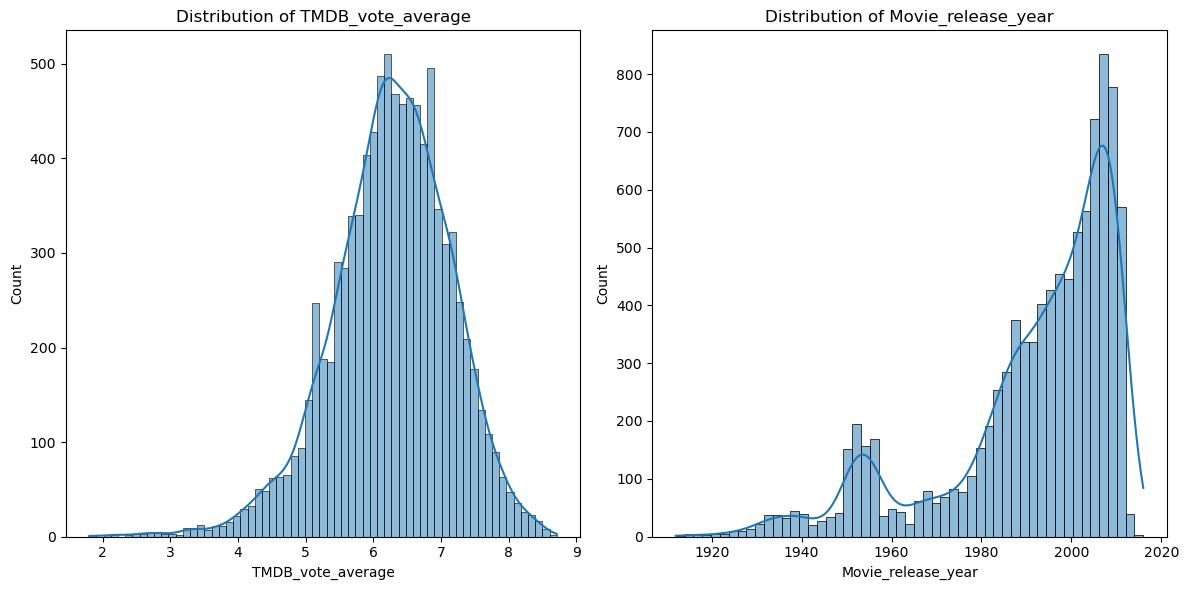

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


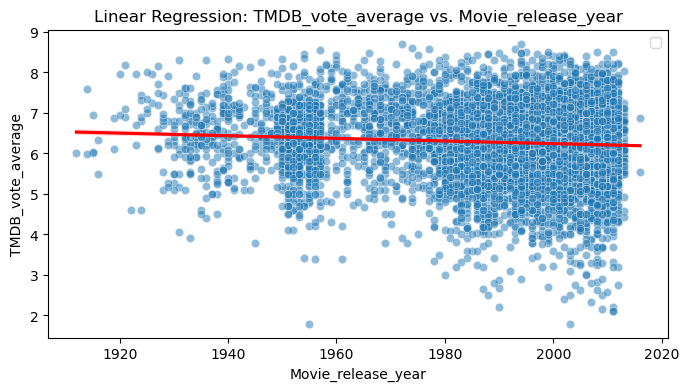

In [18]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "Movie_release_year")


**Runtime**



                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     745.8
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          4.30e-158
Time:                        12:39:19   Log-Likelihood:                -11779.
No. Observations:                9423   AIC:                         2.356e+04
Df Residuals:                    9421   BIC:                         2.358e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.0693      0.045    113.278

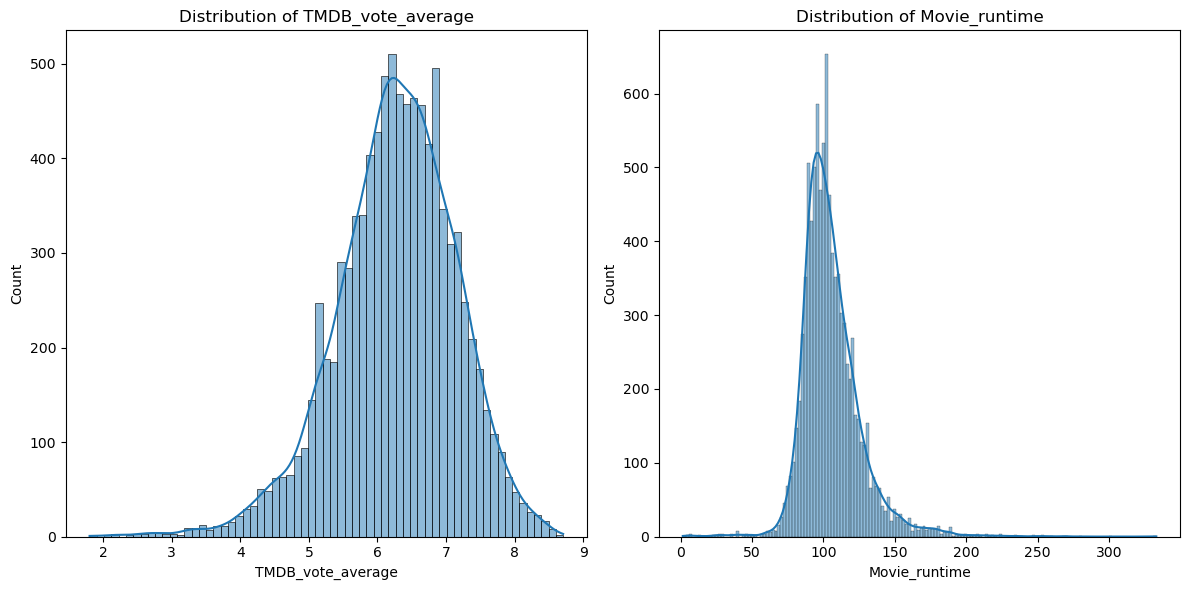

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


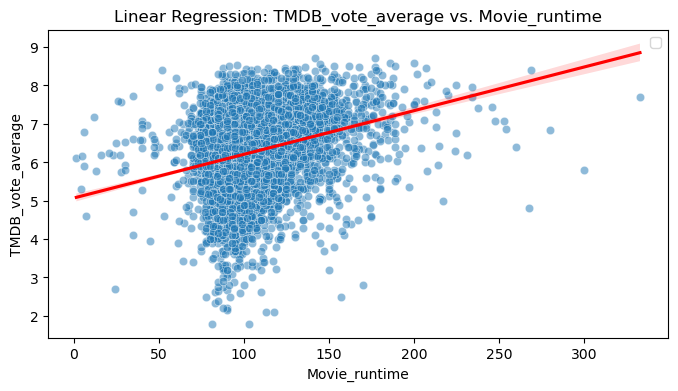

In [19]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "Movie_runtime")

**Vote count log**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     2235.
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:39:22   Log-Likelihood:                -11135.
No. Observations:                9423   AIC:                         2.227e+04
Df Residuals:                    9421   BIC:                         2.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.1905    

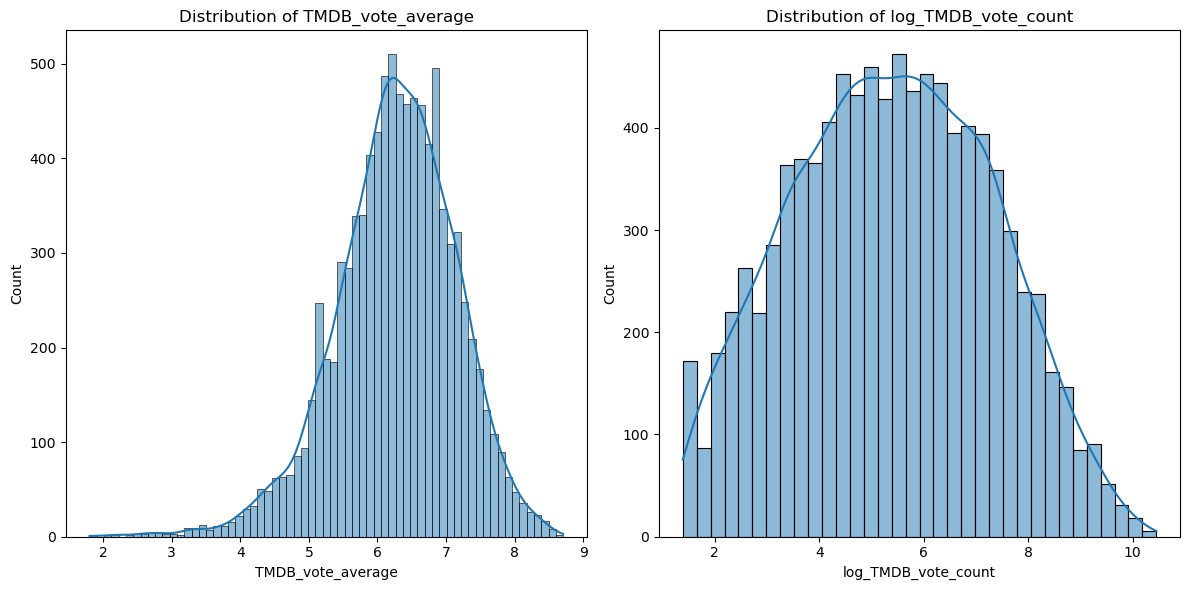

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


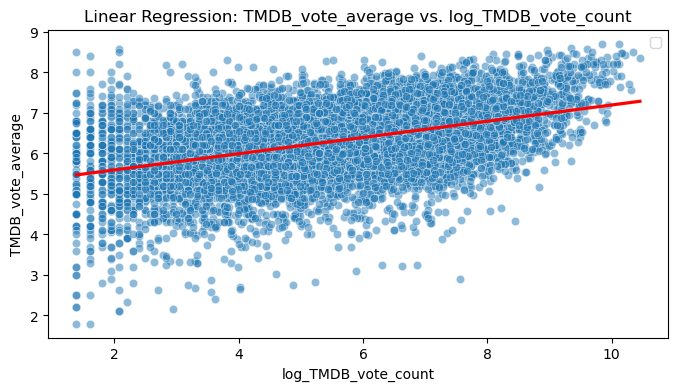

In [20]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "log_TMDB_vote_count")

**TMDB vote average vs log Movie box office revenue**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     507.3
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          1.85e-109
Time:                        12:39:24   Log-Likelihood:                -11891.
No. Observations:                9423   AIC:                         2.379e+04
Df Residuals:                    9421   BIC:                         2.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

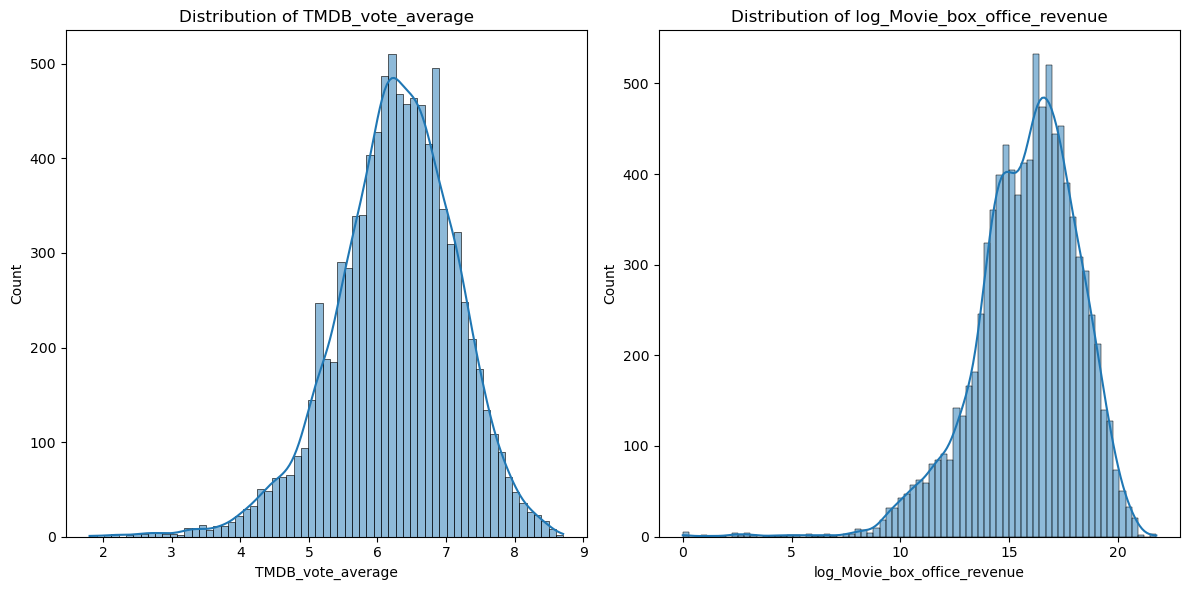

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


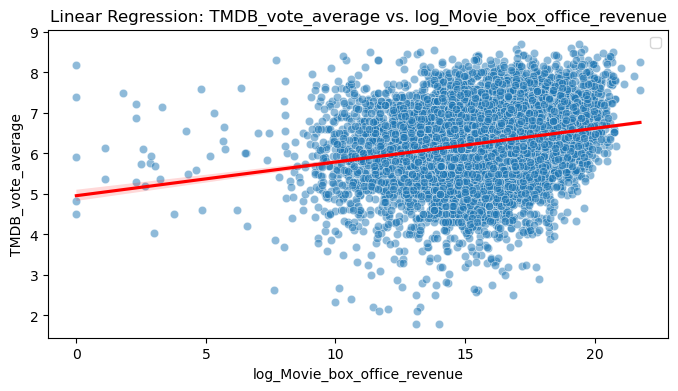

In [21]:
plot_linear_regression(movie_metadata,"TMDB_vote_average","log_Movie_box_office_revenue")

**TMDB vote average log movie box office revenue/log tmdb budget**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     254.5
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           4.46e-55
Time:                        12:39:26   Log-Likelihood:                -3789.4
No. Observations:                3028   AIC:                             7583.
Df Residuals:                    3026   BIC:                             7595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

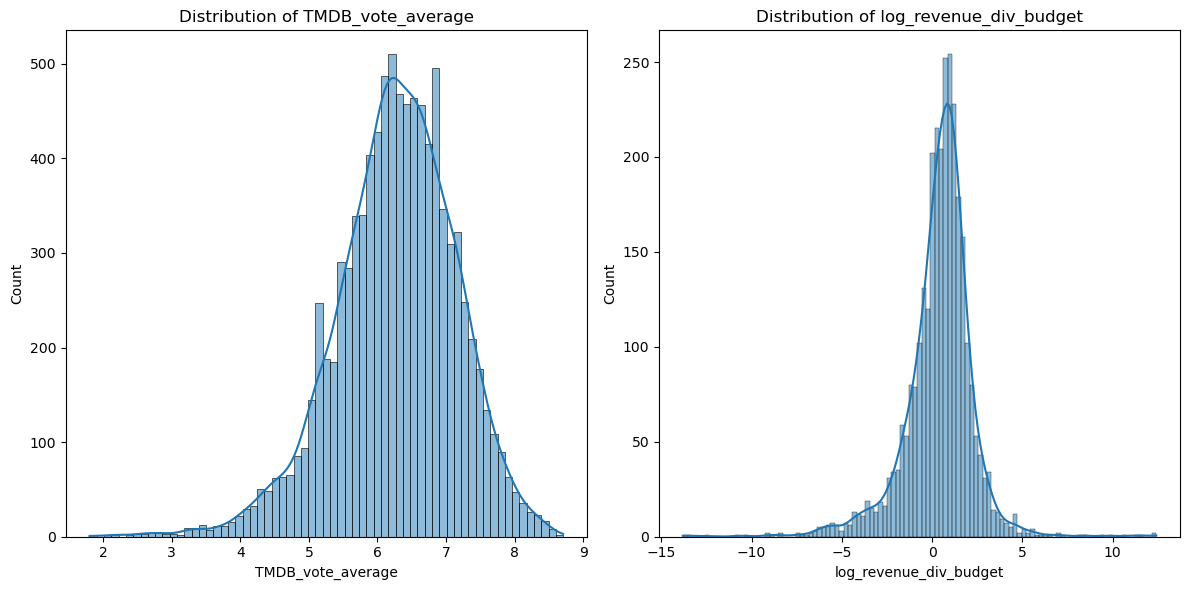

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


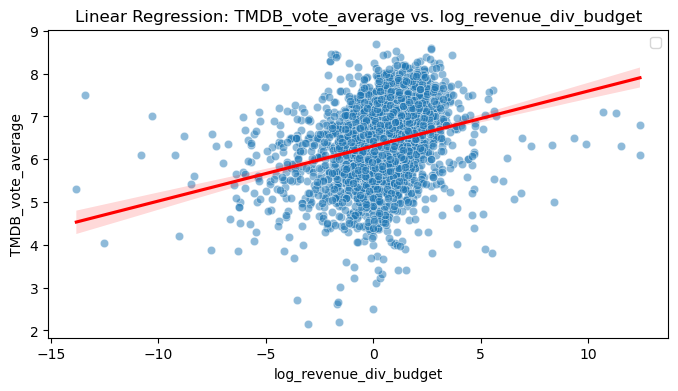

In [22]:
movie_metadata['log_revenue_div_budget'] = np.log1p(
    (movie_metadata['Movie_box_office_revenue'] - movie_metadata['TMDB_budget']) / movie_metadata['TMDB_budget']
)
plot_linear_regression(movie_metadata,"TMDB_vote_average","log_revenue_div_budget")

**Male actor percentage**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.857
Date:                Wed, 20 Dec 2023   Prob (F-statistic):             0.0155
Time:                        12:39:28   Log-Likelihood:                -11767.
No. Observations:                9194   AIC:                         2.354e+04
Df Residuals:                    9192   BIC:                         2.355e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.19

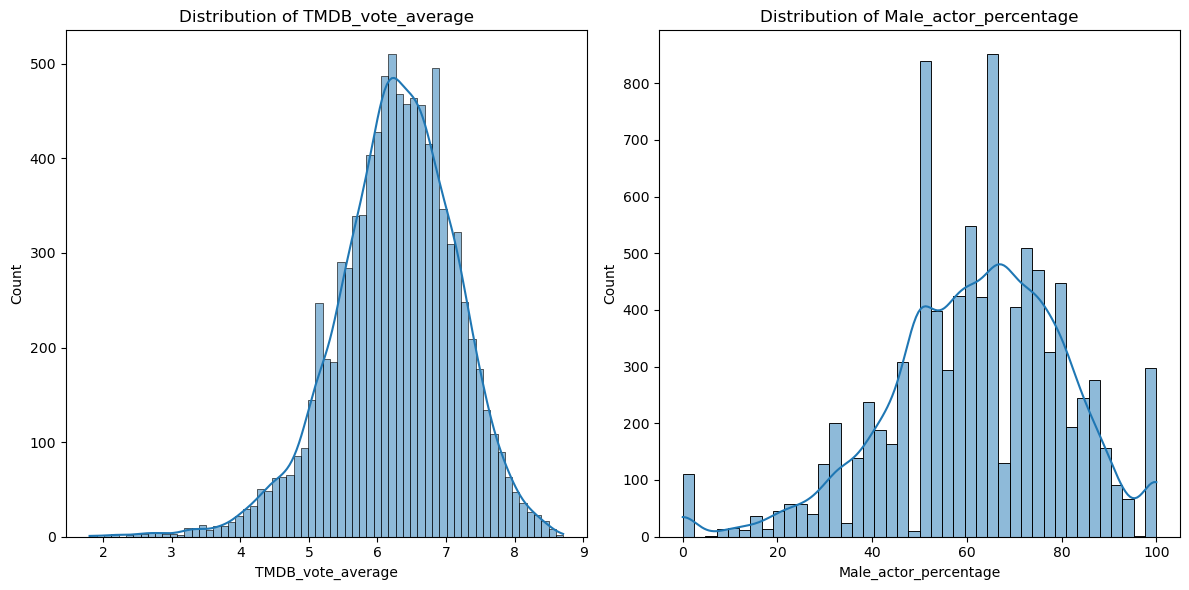

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


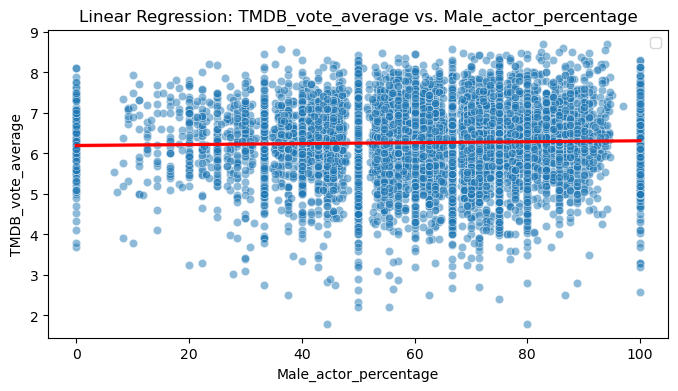

In [23]:
plot_linear_regression(movie_metadata,'TMDB_vote_average','Male_actor_percentage')

**Average age of actors**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01854
Date:                Wed, 20 Dec 2023   Prob (F-statistic):              0.892
Time:                        12:39:30   Log-Likelihood:                -11371.
No. Observations:                8896   AIC:                         2.275e+04
Df Residuals:                    8894   BIC:                         2.276e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

KeyboardInterrupt: 

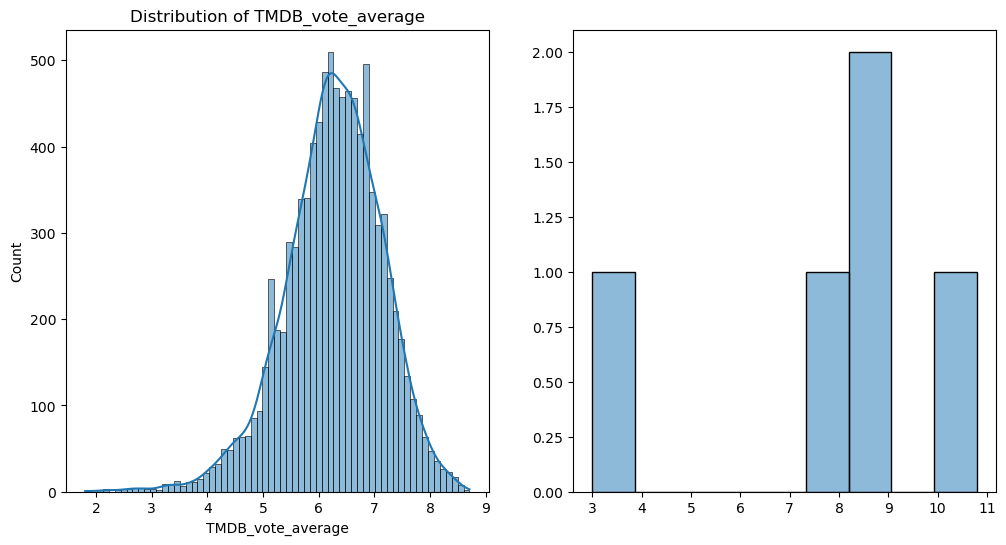

In [24]:
plot_linear_regression(movie_metadata,'TMDB_vote_average','Mean_actor_age_at_movie_release')